<a href="https://colab.research.google.com/github/kbrh3/AI-algorithm-practice/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install islp

In [2]:
from ISLP import load_data #import load function
data = load_data('Auto')
data.head(10) #first ten rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [3]:
import pandas as pd
data = pd.read_csv('Auto.csv')
data.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
388,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
389,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
390,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
391,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


#import libraries



In [4]:
import numpy as np #handles numbers and arrays
import seaborn as sns #for visualizations
#pd will handle dataset files
import statsmodels.api as sm #to create linear model

from sklearn.metrics import mean_squared_error #to compute mse
import matplotlib.pyplot as plt #for visualization



#Dataset Analysis


In [6]:
boston_data = pd.read_csv('Boston.csv')
data.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [8]:
boston_data.describe()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


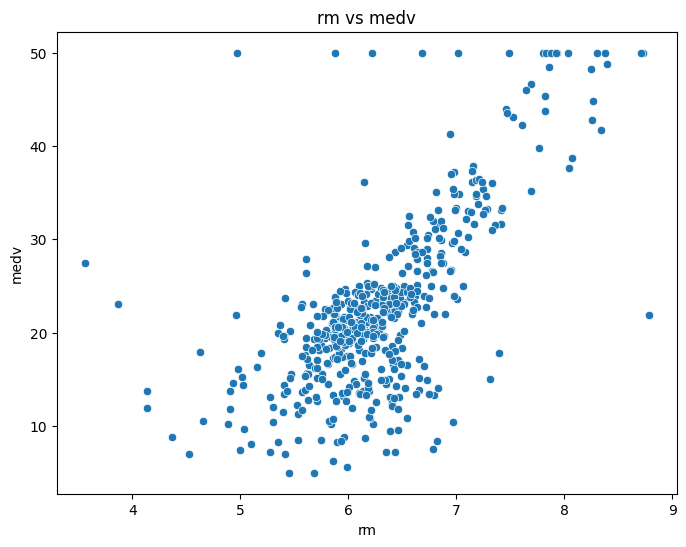

In [14]:
def analyze_column(data, column, target_column):
  """Analyze a single column against the target."""
  # Scatter plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=data, x=column, y=target_column)
  plt.title(f'{column} vs {target_column}')
  plt.xlabel(column)
  plt.ylabel(target_column)
  plt.show()

target_column = 'medv'
analyze_column(boston_data, 'rm', target_column)

#dataset preprocessing

In [18]:
boston_data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [19]:
#delete "unamed" column
boston_data = boston_data.drop(['Unnamed: 0'], axis = 1) #can drop multiple columns with , inside []
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [20]:
boston_data = sm.add_constant(boston_data)
#need to add a column of ones to the input if you want to use stats models to calc
#the intercept b0 ( where it crosses y axis in basic lr formula)
#b/c it doesnt auto take b0 into account - this matters for a 'stats' model
boston_data.head()


,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [23]:
y = boston_data.medv
#y = boston_data[['medv']]
y.head()
# grab the dependent variable / target variable

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
x = boston_data.drop(['medv'], axis = 1)
#grab all features by dropping medv
x.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


#simple linear regression


In [28]:
simple_lr = sm.OLS(y,x[['const','ptratio']])
#created model, now train
results = simple_lr.fit()

#show results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.61e-34
Time:                        22:55:59   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

In [31]:
#calculate mean squared error (MSE)
y_hat = results.predict(x[['const','ptratio']])
mse = mean_squared_error(y,y_hat)
print(mse)
#r squared is lower and mean squared is higher on 'rm'

62.652200013769274


#multiple linear regression

In [36]:
mult_lr = sm.OLS(y,x) #now we include all column values
#created model, now train
results = mult_lr.fit()

#show results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.23e-133
Time:                        23:09:35   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

In [35]:
y_hat = results.predict()
mse = mean_squared_error(y,y_hat)
print(mse)

62.652200013769274
